<ipython-input-11-540a7eff2a8e>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  line = choice(chars)
<ipython-input-11-540a7eff2a8e>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  line += choice(chars).rotate(normal(0, np.pi*row)).scale(normal(1 + 1 / (row+1), 0.25 - 0.25 / (row+1))).translate(5 + col*1.5, 1 / (row + 1 * random.random()))


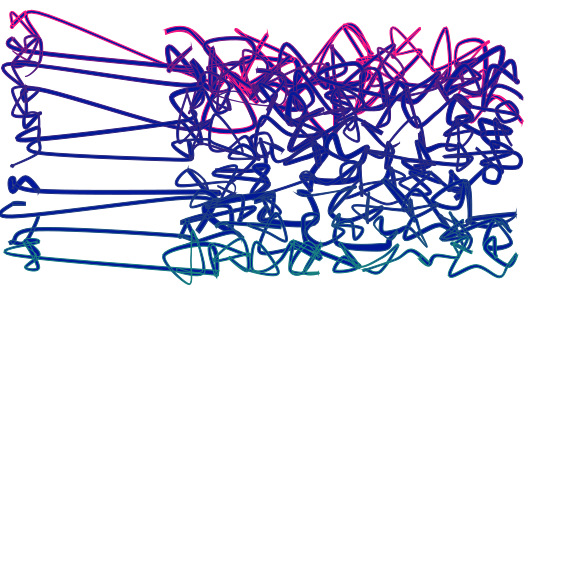

In [11]:
import random
from numpy.random import uniform, normal, choice
from scipy.stats import truncnorm
from bezmerizing import Polyline
import numpy as np
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]
def grid_glyph():
    pts = []
    for i in range(int(t_normal(4, 12, 8, 2))):
        x = (choice([-0.5, 0, 0.5]))
        y = (choice([-0.5, 0, 0.5]))
        pts.append([x, y])
    return Polyline(pts)
from flat import document, shape, rgb, rgba
d = document(200, 200, 'mm')
chars = [grid_glyph() for i in range(26)]

page = d.addpage()
for row in range(10):
    stroke_fig = shape().fill(rgba(2, 25, random.random()*10 + 150, 255)).stroke(rgba(255/(row+1), 255/(10-row+1), 128, 255))
    line = choice(chars)
    for col in range(1, 10):
        # rotate, scale(normal(...)) add a bit of size variation to the glyphs
        line += choice(chars).rotate(normal(0, np.pi*row)).scale(normal(1 + 1 / (row+1), 0.25 - 0.25 / (row+1))).translate(5 + col*1.5, 1 / (row + 1 * random.random()))
    # translate the row to the right place on the screen and make it bigger
    line = line.translate(1, 1+row*1).scale(9)
    # set thicknesses to random values
    fancy = line.fancy_curve(thicknesses=[t_normal(0, 5, 1, 0.5) for i in range(40)],
                             samples_per=12)
    page.place(stroke_fig.polygon(fancy))
#     page.place(line_fig.polyline(line)) # uncomment to see original polylines
#     page.place(curve_fig.path(smooth))
show(page)